In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv('haberman.csv')
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [3]:
df.shape

(306, 4)

In [13]:
df['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

Above analysis implies there are only 306 samples and each sample has only 4 features. It concludes we're dealing with very small dataset. Also not that there are more no of examples that deal with status = 1 i.e. Survived

# Analyze individual feature

In [12]:
df.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [9]:
print(len(df['age'].value_counts()), '\n-----------------------------------------------------')
df['age'].value_counts()

49 
-----------------------------------------------------


52    14
54    13
50    12
47    11
53    11
43    11
57    11
55    10
65    10
49    10
38    10
41    10
61     9
45     9
42     9
63     8
59     8
62     7
44     7
58     7
56     7
46     7
70     7
34     7
48     7
37     6
67     6
60     6
51     6
39     6
66     5
64     5
72     4
69     4
40     3
30     3
68     2
73     2
74     2
36     2
35     2
33     2
31     2
78     1
71     1
75     1
76     1
77     1
83     1
Name: age, dtype: int64

Thus there are 49 different ages present in the dataset. Maximum no. of people lies within range 50-54.

c:\users\hrishi\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\hrishi\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


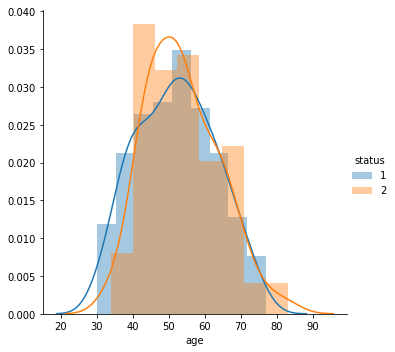

In [11]:
sb.FacetGrid(df, hue = 'status', size = 5).map(sb.distplot, 'age').add_legend();

c:\users\hrishi\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\hrishi\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


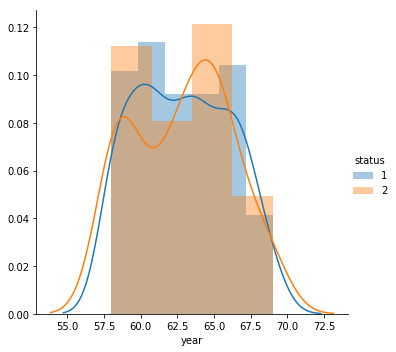

In [14]:
sb.FacetGrid(df, hue = 'status', size = 5).map(sb.distplot, 'year').add_legend();

c:\users\hrishi\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\hrishi\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


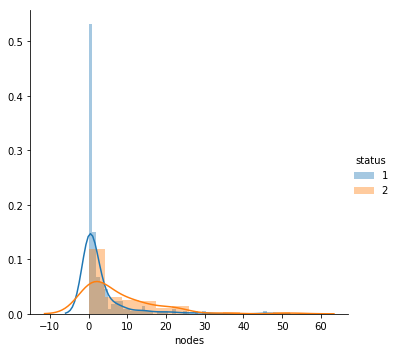

In [15]:
sb.FacetGrid(df, hue = 'status', size = 5).map(sb.distplot, 'nodes').add_legend();

There's no impactful linear separation found between suervived and non-survived data from individual feature. But one interesting thing found from above (3rd) distribution is when nodes value is 0 -> there's significant spike for 'survived'. As no. of nodes are incresing, probability of survival is decreasing significantly.

In [17]:
import pandas_profiling as pp
profile = pp.ProfileReport(df)
profile.to_file(outputfile="output.html")

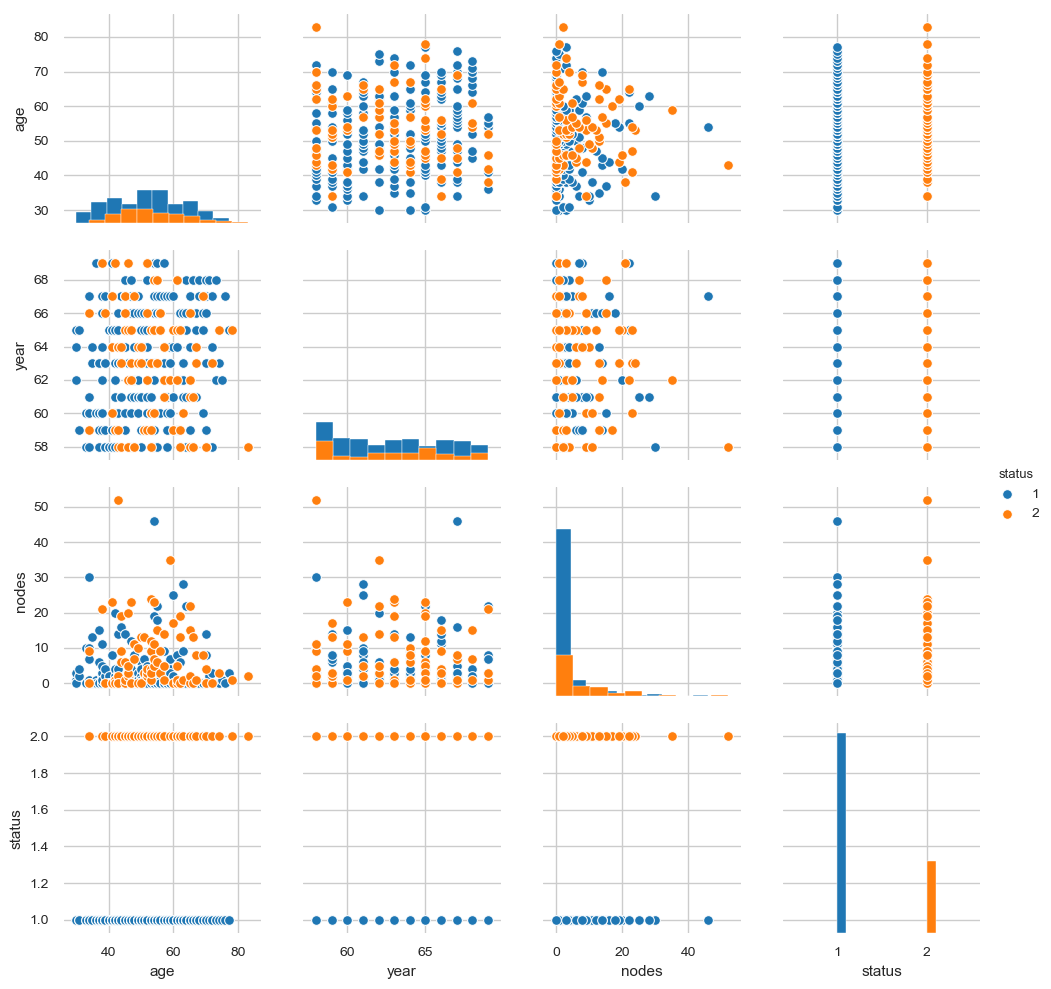

In [24]:
sb.set_style("whitegrid");
sb.pairplot(df, hue = 'status', diag_kind = 'hist');

In [25]:
df.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


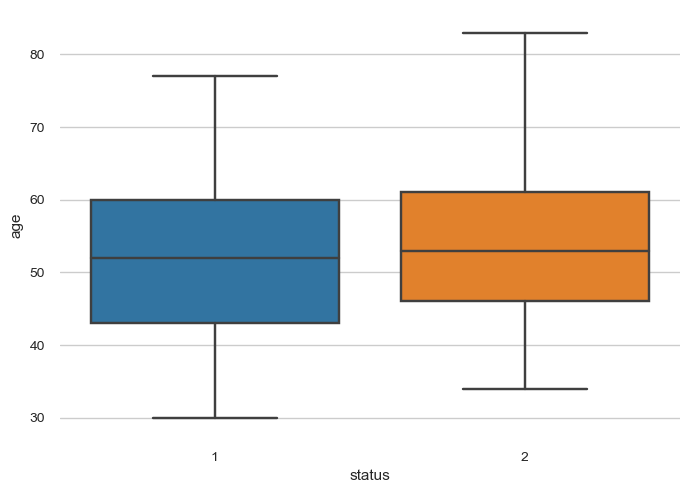

In [27]:
sb.boxplot(x='status',y='age', data=df)

c:\users\hrishi\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


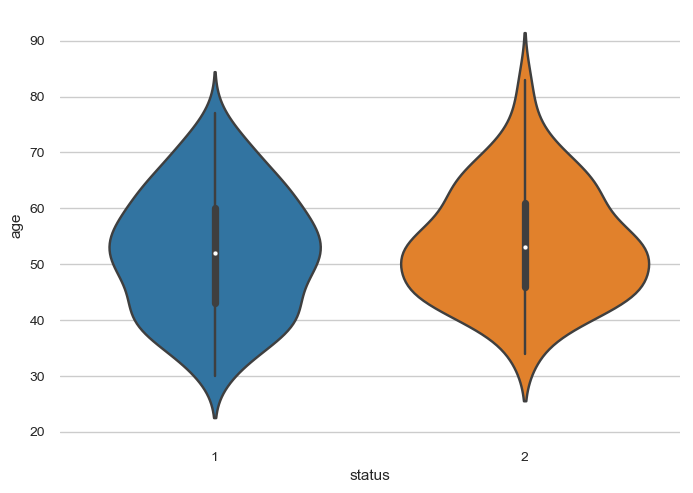

In [31]:
sb.violinplot(x='status',y='age', data=df);

People below age 35 are more like to survive.

In [36]:
df[df['age']<35].describe()

,age,year,nodes,status
count,14.000000,14.000000,14.000000,14.000000
mean,32.571429,61.714286,5.500000,1.142857
std,1.741542,3.099096,8.026399,0.363137
min,30.000000,58.000000,0.000000,1.000000
25%,31.000000,59.250000,0.250000,1.000000
50%,33.500000,60.500000,2.500000,1.000000
75%,34.000000,64.750000,8.500000,1.000000
max,34.000000,67.000000,30.000000,2.000000


People above age 76 are less like to survive.

In [44]:
df[df['age']>76]['status'].value_counts()

2    2
1    1
Name: status, dtype: int64

c:\users\hrishi\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\hrishi\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


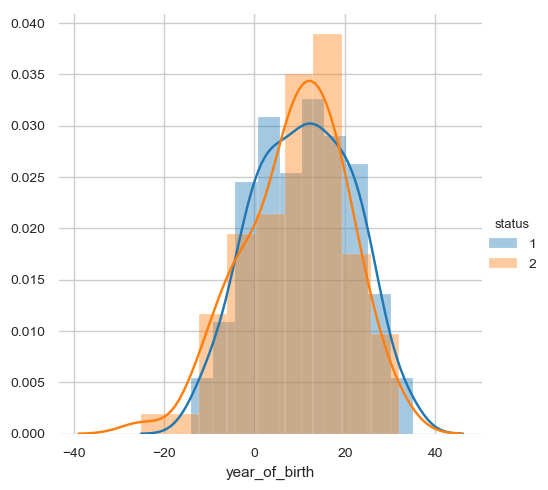

In [48]:
df['year_of_birth'] = df['year'] - df['age']
sb.FacetGrid(df, hue = 'status', size = 5).map(sb.distplot, 'year_of_birth').add_legend();

In [34]:
df[df['status']==2].describe()

,age,year,nodes,status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


In [35]:
df[df['status']==1].describe()

,age,year,nodes,status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


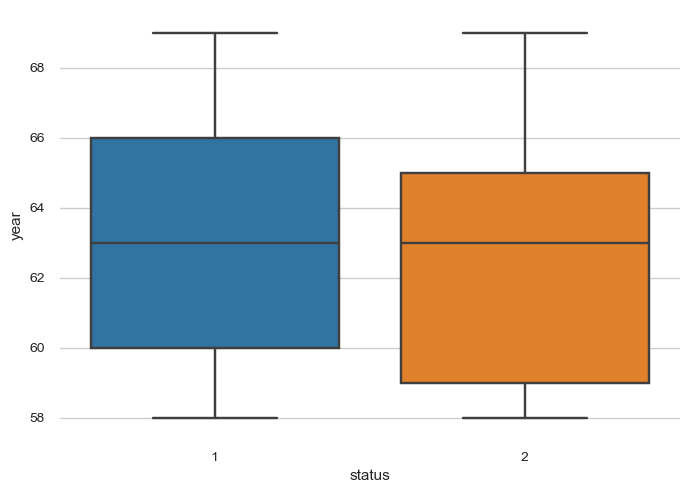

In [28]:
sb.boxplot(x='status',y='year', data=df)

c:\users\hrishi\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


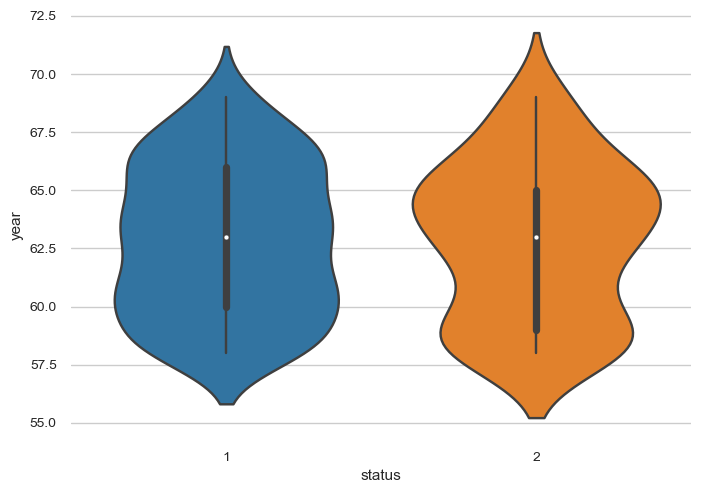

In [32]:
sb.violinplot(x='status',y='year', data=df)

c:\users\hrishi\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


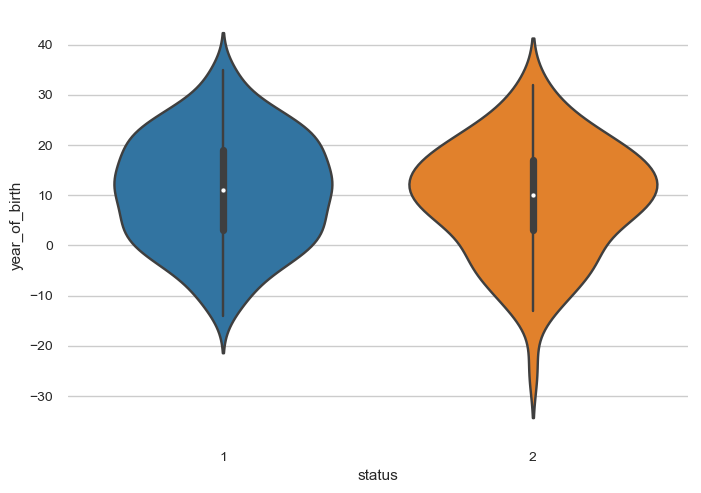

In [46]:
sb.violinplot(x = 'status', y = 'year_of_birth', data = df)

In [50]:
df['year_of_birth_bins'] = pd.cut(df['year_of_birth'], bins=[-30,-20,-10,0,10,20,30,40,50], labels=[1870,1880,1890,1900,1910,1920,1930,1940])
pd.crosstab(df['year_of_birth_bins'], df['status'], rownames=['year_of_birth'], colnames=['status'])

status,1,2
year_of_birth,,
1870,0,1
1880,6,3
1890,39,14
1900,62,24
1910,68,27
1920,44,10
1930,6,2


People born in and below -20 i.e. 1880 are not survived.

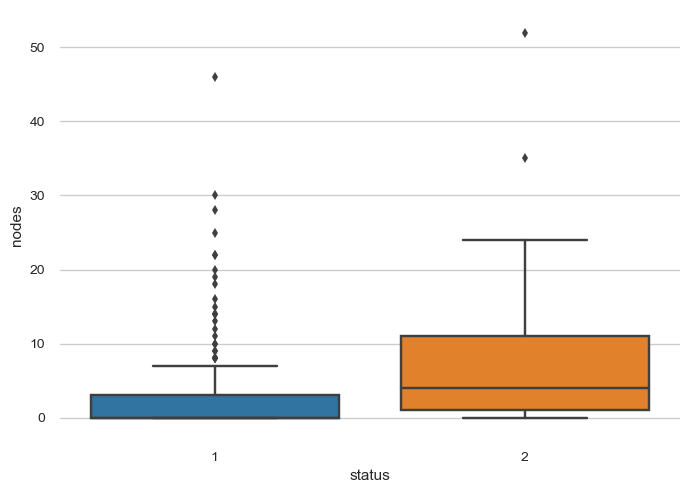

In [30]:
sb.boxplot(x='status',y='nodes', data=df)

Most of people having 0 nodes are survived. But trend is not distinct.

c:\users\hrishi\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


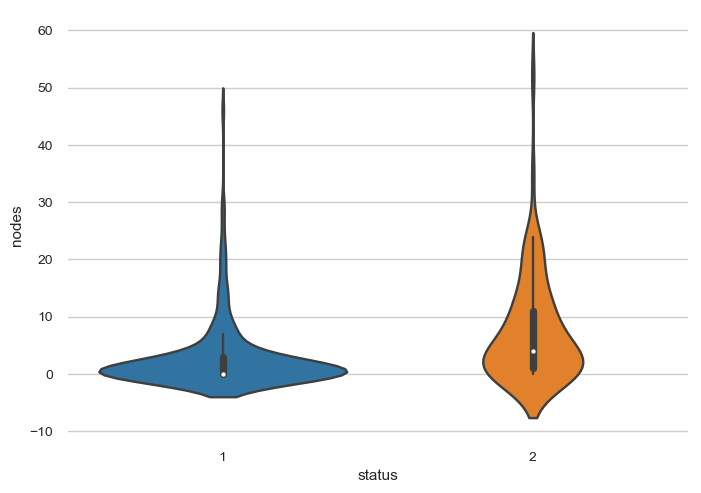

In [33]:
sb.violinplot(x='status',y='nodes', data=df)

Survivals has maximum density around 0 to 5 nodes whereas non-survivals tend to have more no. of nodes.